# CIFAR-10 Presentation Visuals

This notebook generates presentation-ready charts from project CSV files and TensorBoard logs.

## 1. Imports and paths

In [32]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.ml_utils import apply_notebook01_plot_style

cwd = Path.cwd()
if cwd.name.lower() == "notebooks":
    PROJECT_ROOT = cwd.parent
elif cwd.name.lower() == "cifar10_project":
    PROJECT_ROOT = cwd
elif (cwd / "cifar10_project").is_dir():
    PROJECT_ROOT = cwd / "cifar10_project"
else:
    PROJECT_ROOT = cwd

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

DATA_DIR = PROJECT_ROOT / "data"
REPORTS_DIR = PROJECT_ROOT / "reports"
IMAGES_DIR = PROJECT_ROOT / "images" / "presentation"
IMAGES_DIR.mkdir(parents=True, exist_ok=True)

sns.set_theme(style="dark")

def apply_project_style(ax, grid_axis="y"):
    apply_notebook01_plot_style(ax.figure, ax, grid_axis=grid_axis)

def style_legend(legend):
    if legend is None:
        return
    for text in legend.get_texts():
        text.set_color("white")
    frame = legend.get_frame()
    if frame is not None:
        frame.set_facecolor("#212529")
        frame.set_edgecolor("#212529")

print("Project root:", PROJECT_ROOT)
print("Images output dir:", IMAGES_DIR)

Project root: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project
Images output dir: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project/images/presentation


## 2. Load data sources

In [33]:
performance_path = DATA_DIR / "model_performance_report.csv"
exp_path = DATA_DIR / "experiments.csv"
exp_tuned_path = DATA_DIR / "experiments_03_tuned.csv"
vgg_hist_path = DATA_DIR / "vgg_bn_tuned_history.csv"

performance_df = pd.read_csv(performance_path)
experiments_df = pd.read_csv(exp_path)
experiments_tuned_df = pd.read_csv(exp_tuned_path)
vgg_hist_df = pd.read_csv(vgg_hist_path)

if "model_name" in performance_df.columns:
    performance_df["model_name"] = performance_df["model_name"].astype(str).str.replace(
        r"(?i)stacking", "Francesinha", regex=True
    )
if "framework" in performance_df.columns:
    performance_df["framework"] = performance_df["framework"].astype(str).str.replace(
        r"(?i)stacking", "francesinha", regex=True
    )

for col in ["accuracy", "precision", "recall", "f1", "train_time_sec"]:
    if col in performance_df.columns:
        performance_df[col] = pd.to_numeric(performance_df[col], errors="coerce")

if "timestamp" in performance_df.columns:
    performance_df["timestamp"] = pd.to_datetime(performance_df["timestamp"], errors="coerce")

print("Performance rows:", len(performance_df))
print("Experiments rows:", len(experiments_df))
print("Tuned experiments rows:", len(experiments_tuned_df))
print("VGG history rows:", len(vgg_hist_df))

Performance rows: 27
Experiments rows: 2
Tuned experiments rows: 3
VGG history rows: 129


## 3. Top models by accuracy

/tmp/ipykernel_35343/438060039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_models, x="accuracy", y="model_name", palette="viridis", ax=ax)


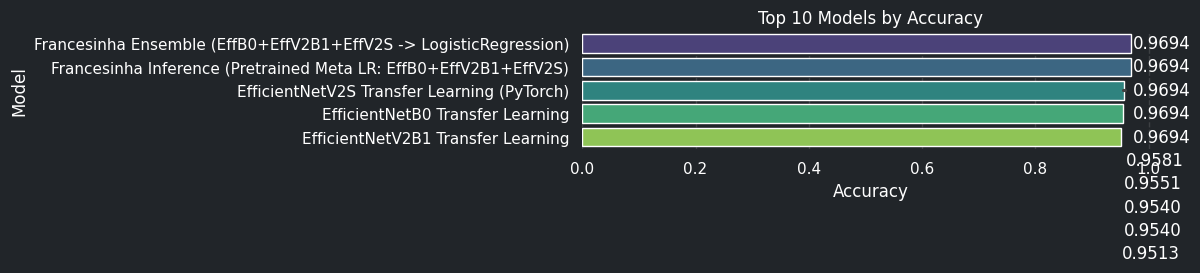

Saved: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project/images/presentation/top10_models_accuracy.png


In [34]:
top_models = (
    performance_df.dropna(subset=["accuracy", "model_name"])
    .sort_values("accuracy", ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_models, x="accuracy", y="model_name", palette="viridis", ax=ax)
apply_project_style(ax, grid_axis="x")
ax.set_title("Top 10 Models by Accuracy")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Model")

for idx, acc in enumerate(top_models["accuracy"].to_list()):
    ax.text(float(acc) + 0.002, idx, f"{acc:.4f}", va="center", color="white")

plt.tight_layout()
top_acc_path = IMAGES_DIR / "top10_models_accuracy.png"
fig.savefig(top_acc_path, dpi=300, facecolor=fig.get_facecolor())
plt.show()
print("Saved:", top_acc_path)

## 4. Metrics heatmap (top models)

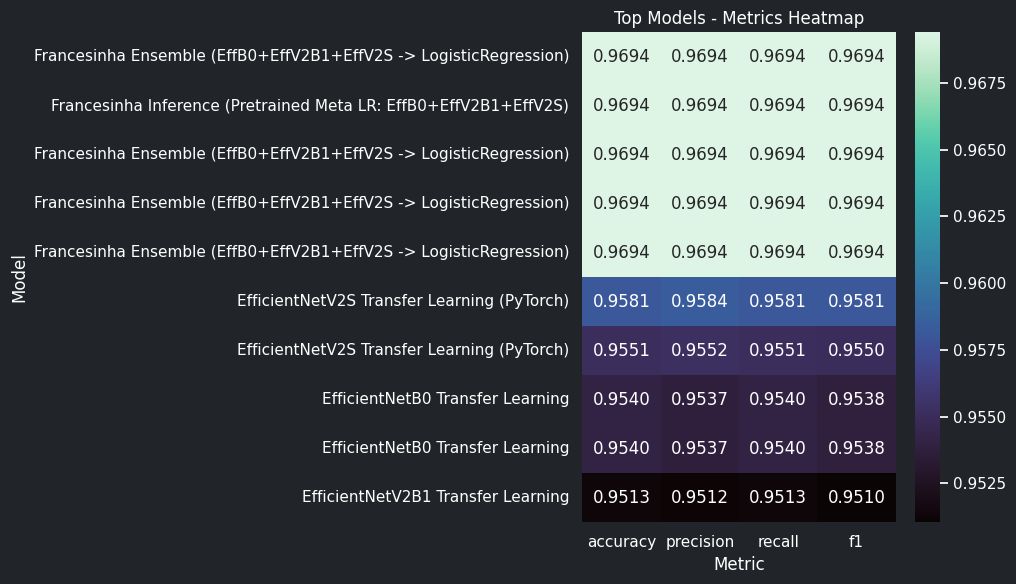

Saved: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project/images/presentation/top_models_metrics_heatmap.png


In [35]:
metrics_cols = [c for c in ["accuracy", "precision", "recall", "f1"] if c in top_models.columns]
heat_df = top_models[["model_name", *metrics_cols]].set_index("model_name")

fig, ax = plt.subplots(figsize=(10, 6))
hm = sns.heatmap(heat_df, annot=True, fmt=".4f", cmap="mako", cbar=True, ax=ax)
apply_notebook01_plot_style(fig, ax, grid_axis=None)
ax.set_title("Top Models - Metrics Heatmap")
ax.set_xlabel("Metric")
ax.set_ylabel("Model")

if hm.collections and hm.collections[0].colorbar is not None:
    cbar = hm.collections[0].colorbar
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(cbar.ax.get_yticklabels(), color="white")
    cbar.outline.set_edgecolor("white")

plt.tight_layout()
heatmap_path = IMAGES_DIR / "top_models_metrics_heatmap.png"
fig.savefig(heatmap_path, dpi=300, facecolor=fig.get_facecolor())
plt.show()
print("Saved:", heatmap_path)

## 5. Training time vs accuracy

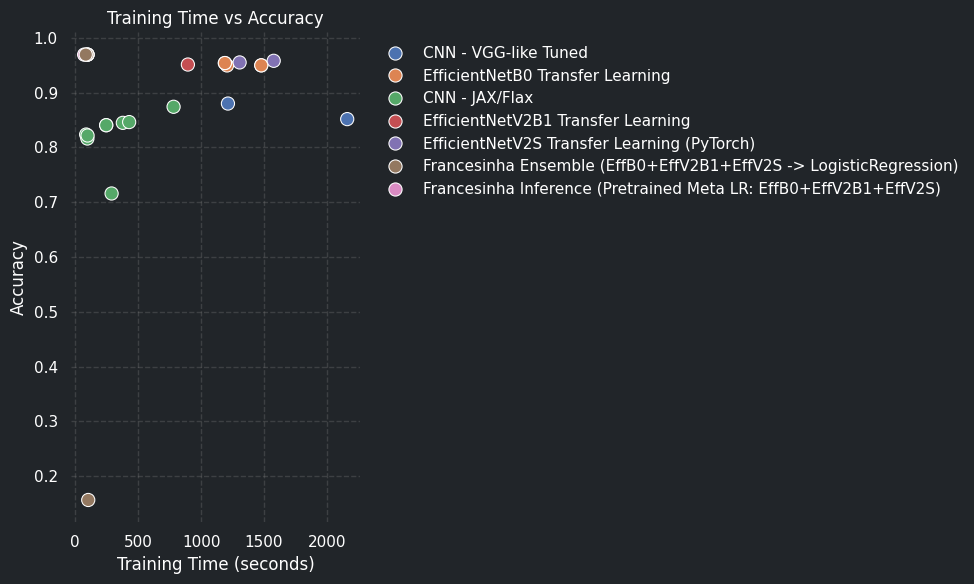

Saved: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project/images/presentation/training_time_vs_accuracy.png


In [36]:
scatter_df = performance_df.dropna(subset=["train_time_sec", "accuracy"]).copy()
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x="train_time_sec", y="accuracy", hue="model_name", s=90, ax=ax)
apply_project_style(ax, grid_axis="both")
ax.set_title("Training Time vs Accuracy")
ax.set_xlabel("Training Time (seconds)")
ax.set_ylabel("Accuracy")
legend = ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
style_legend(legend)
plt.tight_layout()
scatter_path = IMAGES_DIR / "training_time_vs_accuracy.png"
fig.savefig(scatter_path, dpi=300, facecolor=fig.get_facecolor())
plt.show()
print("Saved:", scatter_path)

## 6. Experiment results comparison

/tmp/ipykernel_35343/2063371422.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_exp, x="source", y="test_acc", palette="Set2", ax=ax)


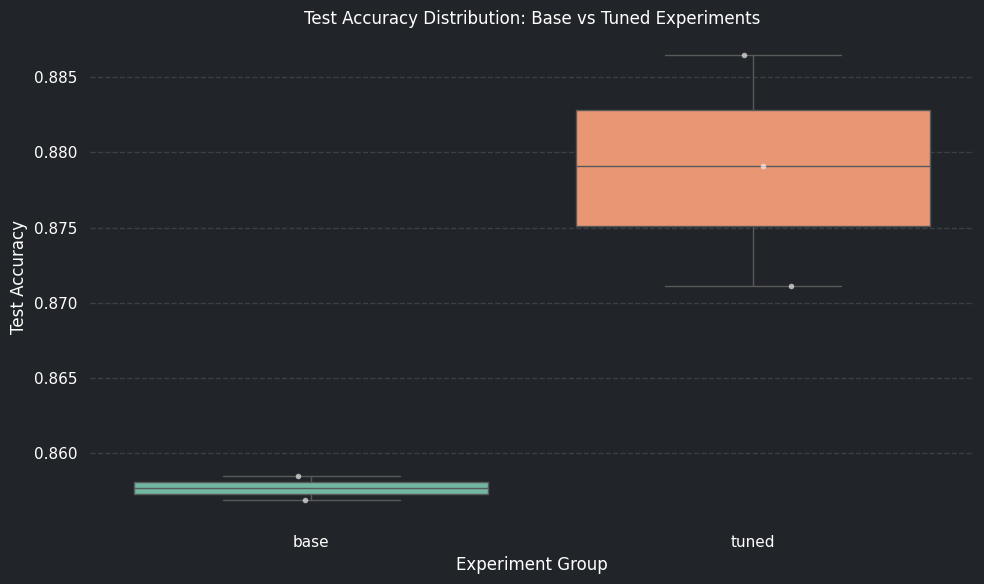

Saved: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project/images/presentation/experiment_test_acc_base_vs_tuned.png


In [37]:
exp_plot_df = experiments_df.copy()
exp_plot_df["source"] = "base"
exp_tuned_plot_df = experiments_tuned_df.copy()
exp_tuned_plot_df["source"] = "tuned"
combined_exp = pd.concat([exp_plot_df, exp_tuned_plot_df], ignore_index=True)

for col in ["best_val_acc", "test_acc"]:
    combined_exp[col] = pd.to_numeric(combined_exp[col], errors="coerce")

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=combined_exp, x="source", y="test_acc", palette="Set2", ax=ax)
sns.stripplot(data=combined_exp, x="source", y="test_acc", color="#f8f9fa", alpha=0.65, size=4, ax=ax)
apply_project_style(ax, grid_axis="y")
ax.set_title("Test Accuracy Distribution: Base vs Tuned Experiments")
ax.set_xlabel("Experiment Group")
ax.set_ylabel("Test Accuracy")
plt.tight_layout()
exp_comp_path = IMAGES_DIR / "experiment_test_acc_base_vs_tuned.png"
fig.savefig(exp_comp_path, dpi=300, facecolor=fig.get_facecolor())
plt.show()
print("Saved:", exp_comp_path)

## 7. VGG tuned training curves

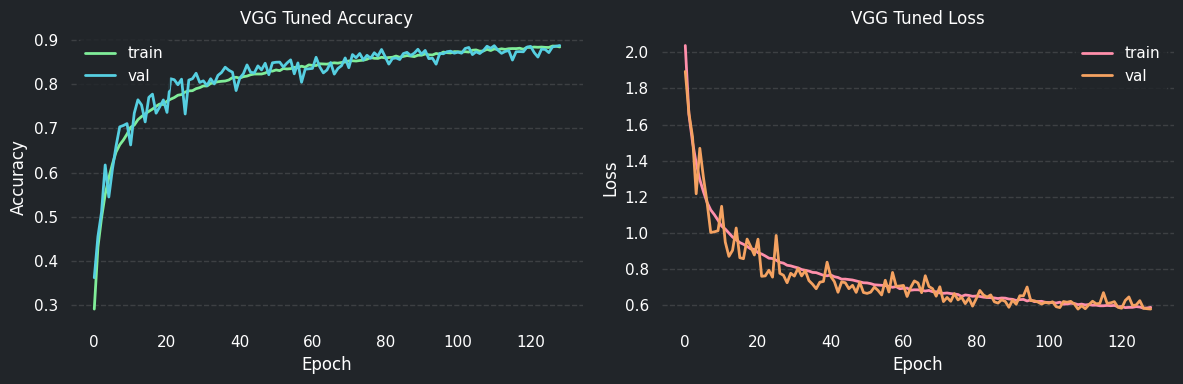

Saved: /mnt/c/Users/User/Documents/Bootcamp AI and Data Science/Linux/DataScience_ironhack/Week6/project/cifar10_project/images/presentation/vgg_tuned_training_curves.png


In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(vgg_hist_df["epoch"], vgg_hist_df["accuracy"], label="train", color="#80ed99", linewidth=2)
axes[0].plot(vgg_hist_df["epoch"], vgg_hist_df["val_accuracy"], label="val", color="#56cfe1", linewidth=2)
apply_project_style(axes[0], grid_axis="y")
axes[0].set_title("VGG Tuned Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
legend0 = axes[0].legend()
style_legend(legend0)

axes[1].plot(vgg_hist_df["epoch"], vgg_hist_df["loss"], label="train", color="#ff8fab", linewidth=2)
axes[1].plot(vgg_hist_df["epoch"], vgg_hist_df["val_loss"], label="val", color="#f4a261", linewidth=2)
apply_project_style(axes[1], grid_axis="y")
axes[1].set_title("VGG Tuned Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
legend1 = axes[1].legend()
style_legend(legend1)

plt.tight_layout()
vgg_curves_path = IMAGES_DIR / "vgg_tuned_training_curves.png"
fig.savefig(vgg_curves_path, dpi=300, facecolor=fig.get_facecolor())
plt.show()
print("Saved:", vgg_curves_path)

## 8. TensorBoard scalar previews (optional)

In [39]:
import importlib

event_accumulator_cls = None
try:
    tb_mod = importlib.import_module("tensorboard.backend.event_processing.event_accumulator")
    event_accumulator_cls = tb_mod.EventAccumulator
except ImportError:
    print("TensorBoard not available in this kernel. Skipping scalar extraction.")

event_files = sorted((REPORTS_DIR / "logs").glob('**/events.out.tfevents.*'))
print("Found TensorBoard event files:", len(event_files))

def read_scalars(event_file):
    ea = event_accumulator_cls(str(event_file))
    ea.Reload()
    tags = ea.Tags().get("scalars", [])
    values = {}
    for tag in tags:
        events = ea.Scalars(tag)
        values[tag] = pd.DataFrame({
            "step": [e.step for e in events],
            "value": [e.value for e in events],
            "tag": tag,
            "file": event_file.parent.name,
        })
    return values

all_scalars = []
if event_accumulator_cls is not None:
    for f in event_files:
        try:
            scalar_dict = read_scalars(f)
            all_scalars.extend(scalar_dict.values())
        except Exception:
            pass

if all_scalars:
    tb_df = pd.concat(all_scalars, ignore_index=True)
    preview_tags = tb_df["tag"].drop_duplicates().head(4).tolist()
    plot_df = tb_df[tb_df["tag"].isin(preview_tags)].copy()
    g = sns.relplot(
        data=plot_df,
        x="step",
        y="value",
        col="tag",
        hue="file",
        kind="line",
        col_wrap=2,
        height=3,
        facet_kws={"sharey": False},
    )
    for ax in g.axes.flatten():
        apply_project_style(ax, grid_axis="y")
    if g._legend is not None:
        style_legend(g._legend)
    g.figure.suptitle("TensorBoard Scalar Preview", y=1.02, color="white")
    tb_path = IMAGES_DIR / "tensorboard_scalar_preview.png"
    g.figure.savefig(tb_path, dpi=300, bbox_inches="tight", facecolor=g.figure.get_facecolor())
    plt.show()
    print("Saved:", tb_path)
else:
    print("No readable TensorBoard scalar data found.")

Found TensorBoard event files: 4
No readable TensorBoard scalar data found.
